In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('Books.csv', sep=',', error_bad_lines=False, usecols=[2,3,4,5,6],encoding="latin-1")

print("Books.csv shape::", books.shape)
print("Books.csv columns:: ", books.columns)
print("Number of Unique Books::",(books.bookISBN.unique().size))

books.head()

Books.csv shape:: (3000, 5)
Books.csv columns::  Index(['bookISBN', 'bookName', 'author', 'yearOfPublication', 'publisher'], dtype='object')
Number of Unique Books:: 3000


,bookISBN,bookName,author,yearOfPublication,publisher
0,1551669382,Enchanted Afternoon,Susan Wiggs,2002,Mira
1,0743202961,Every Breath You Take : A True Story of Obsess...,Ann Rule,2001,Free Press
2,067151699X,The HIDDEN LIFE OF DOGS,Elizabeth Marshall Thomas,1995,Pocket
3,0804108528,Inadmissible Evidence,Philip Friedman,1993,Ivy Books
4,0061094145,"The Fifth Dominion (Imajica, Book 1)",Clive Barker,1995,HarperTorch


In [3]:
users = pd.read_csv('Users.csv', sep=',', error_bad_lines=False, usecols=[2,3,4], encoding="latin-1")
print("Users.csv shape::", users.shape)
print("Users.csv columns:: ", users.columns)
print("Number of Unique Users::",(users.user.unique().size))

users.head()

Users.csv shape:: (1000, 3)
Users.csv columns::  Index(['user', 'location', 'age'], dtype='object')
Number of Unique Users:: 1000


,user,location,age
0,43157.0,"windsor, ontario, canada",22.0
1,99032.0,"white plains, new york, usa",25.0
2,42883.0,"the woodlands, texas, usa",51.0
3,183800.0,"quebec, quebec, canada",29.0
4,188796.0,"toronto, ontario, canada",NaN


In [4]:
ratings = pd.read_csv('UserEvents.csv', sep=',', error_bad_lines=False, usecols=[1,2,3], encoding="latin-1")

print("UserEvents.csv shape::", users.shape)
print("UserEvents.csv columns:: ", users.columns)
print("Number of Unique users: ",ratings.user.unique().size)
print("Number of Unique books: ",ratings.bookId.unique().size)

ratings.head()

UserEvents.csv shape:: (1000, 3)
UserEvents.csv columns::  Index(['user', 'location', 'age'], dtype='object')
Number of Unique users:  13030
Number of Unique books:  11234


,user,bookId,impression
0,276747,0060517794,checkout
1,276747,0671537458,checkout
2,276747,0679776818,add to cart
3,276822,0060096195,checkout
4,276822,0375821813,checkout


In [5]:
print("Most popular books::")
usersperbook=ratings.bookId.value_counts()
usersperbook.head(10)


Most popular books::


0316666343    438
0385504209    339
0971880107    270
0312195516    246
059035342X    227
0142001740    221
0679781587    210
0060928336    207
0446672211    200
0671027360    190
Name: bookId, dtype: int64

In [6]:
print("Most Active users::")
booksperuser=ratings.user.value_counts()
booksperuser.head(10)

Most Active users::


11676     2803
98391      790
153662     498
16795      432
95359      378
114368     378
104636     303
123883     285
35859      281
204864     270
Name: user, dtype: int64

Visualizing UserEvents data

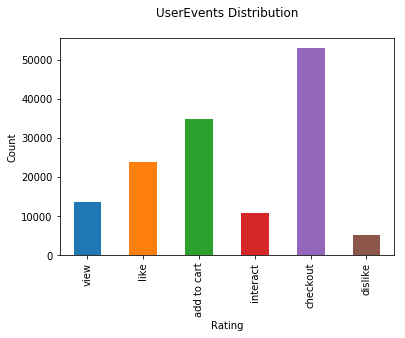

In [7]:
ratings.impression.value_counts(sort=False).plot(kind='bar')
plt.title('UserEvents Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
ratings["impression"]=ratings["impression"].map({"dislike":1,"view":2,"interact":3,"like":4,"add to cart":5,"checkout":6})

In [9]:
average_rating = pd.DataFrame(ratings.groupby('bookId')['impression'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('bookId')['impression'].count())
average_rating.sort_values('ratingCount', ascending=False).head(20)



,impression,ratingCount
bookId,,
0316666343,5.061644,438
0385504209,5.227139,339
0971880107,1.996296,270
0312195516,5.077236,246
059035342X,5.511013,227
0142001740,5.176471,221
0679781587,5.223810,210
0060928336,4.801932,207
0446672211,5.000000,200


In [10]:
ratings_pivot = ratings.pivot(index='user', columns='bookId', values="impression").fillna(0)
print(ratings_pivot.shape)
ratings_pivot.head(20)



(13030, 11234)


bookId,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
user,,,,,,,,,,,,,,,,,,,,,
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ratings_pivot.values

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
user_list=list(ratings_pivot.index)
book_list=list(ratings_pivot.columns)

In [13]:
from scipy.sparse import coo_matrix

R = coo_matrix(ratings_pivot.values)

print ("R Shape::", R.shape)
print ("R Columns::", R.col)
print ("R Rows::",R.row)


R Shape:: (13030, 11234)
R Columns:: [   0 1487 1495 ... 2833 4229 7226]
R Rows:: [    0     1     1 ... 13029 13029 13029]


In [14]:
print(R)

  (0, 0)	2.0
  (1, 1487)	5.0
  (1, 1495)	5.0
  (1, 1812)	4.0
  (1, 5358)	6.0
  (1, 5684)	1.0
  (2, 5259)	6.0
  (2, 5313)	6.0
  (2, 5316)	5.0
  (2, 5891)	5.0
  (2, 7306)	6.0
  (2, 7753)	6.0
  (3, 6187)	5.0
  (4, 6869)	6.0
  (4, 10937)	5.0
  (4, 10954)	6.0
  (4, 11064)	5.0
  (5, 308)	6.0
  (5, 428)	4.0
  (5, 1786)	6.0
  (5, 1817)	6.0
  (5, 1844)	4.0
  (5, 2736)	6.0
  (5, 3485)	3.0
  (5, 3690)	4.0
  :	:
  (13025, 11170)	2.0
  (13025, 11194)	2.0
  (13026, 5946)	5.0
  (13026, 6389)	3.0
  (13026, 8994)	5.0
  (13026, 9063)	6.0
  (13027, 130)	6.0
  (13027, 245)	4.0
  (13027, 1068)	5.0
  (13027, 1253)	6.0
  (13027, 3435)	5.0
  (13027, 3955)	6.0
  (13027, 4572)	4.0
  (13027, 6848)	5.0
  (13027, 7396)	5.0
  (13027, 8314)	5.0
  (13027, 9282)	6.0
  (13027, 9444)	5.0
  (13028, 4426)	2.0
  (13028, 4836)	2.0
  (13028, 10193)	2.0
  (13028, 10472)	5.0
  (13029, 2833)	4.0
  (13029, 4229)	4.0
  (13029, 7226)	5.0


In [15]:
#Performs matrix factorization of the original user item matrix

#from sklearn.metrics.pairwise import cosine_similarity
#from scipy.sparse.linalg import svds

#P, sigma, Q = svds(R,k=3)

#sigma = np.diag(sigma)
#sigma.shape

In [16]:
#  Factor matrix shape
M,N=R.shape

# No of Factors - 3
K=3

# using random values of P and Q 
P=np.random.rand(M,K)
Q=np.random.rand(K,N)


In [17]:
from numpy.linalg import norm

def error(R,P,Q,lamda=0.02):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0 
    for ui in range(len(ratings)):
        rui=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui>0:
            e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\
                lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    return e

In [18]:
error(R,P,Q)

2448445.34990943

In [19]:
rmse = np.sqrt(error(R,P,Q)/len(R.data))

In [20]:
rmse

4.16592016327324

In [21]:
def SGD(R, K, lamda=0.02,steps=10, gamma=0.001):
    
    M,N = R.shape
    P = np.random.rand(M,K)
    Q = np.random.rand(K,N)
    
    rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
    print("Initial RMSE: "+str(rmse))
    
    for step in range(steps):
        for ui in range(len(R.data)):
            rui=R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui>0:
                eui=rui-np.dot(P[u,:],Q[:,i])
                P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
                Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
        rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
        if rmse<0.5:
            break
    print("Final RMSE: "+str(rmse))
    return P,Q

In [22]:
P,Q=SGD(R,K=3,gamma=0.0007,lamda=0.01, steps=100)

Initial RMSE: 4.14980033882697
Final RMSE: 1.1274331454208264


In [23]:
#all_user_predicted_ratings = np.dot(np.dot(P, sigma), Q) 
all_user_ratings =np.matmul(P, Q)

all_user_ratings

array([[2.15729658, 2.58972613, 2.50515593, ..., 1.78492542, 2.13992457,
        2.6216808 ],
       [4.11973117, 4.63003368, 4.58059829, ..., 3.98724   , 4.04984452,
        4.70933574],
       [6.05621347, 6.40138579, 6.86955495, ..., 5.39834681, 6.33244432,
        6.93301768],
       ...,
       [5.22726591, 5.24294294, 5.84184662, ..., 4.88985963, 5.53433705,
        5.8114341 ],
       [2.8980161 , 2.79489102, 3.2202914 , ..., 2.75306786, 3.11282832,
        3.16946208],
       [4.07349632, 4.88647044, 4.53487101, ..., 3.96366899, 3.83294081,
        4.75646583]])

In [24]:
#Converting the reconstructed matrix back to dataframe
# Rounding off to 4 digits instead of default 6 so that output.csv file is less than 1GB
all_user_ratings_df = pd.DataFrame(np.round(all_user_ratings,4),columns=book_list, index=user_list)
all_user_ratings_df.shape

(13030, 11234)

In [25]:
all_user_ratings_df.head(10)


,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
8,2.1573,2.5897,2.5052,2.2861,2.5545,1.5044,2.4085,1.7909,2.4627,2.0303,...,2.9298,2.0858,2.4871,1.7981,1.6841,2.6534,2.3469,1.7849,2.1399,2.6217
99,4.1197,4.6300,4.5806,4.4158,4.5837,2.2927,4.3380,3.1817,4.0557,3.6008,...,4.7955,3.9914,4.0536,2.8834,2.8880,4.6931,3.5923,3.9872,4.0498,4.7093
114,6.0562,6.4014,6.8696,6.6432,6.9496,3.5733,5.8694,4.6321,6.5877,5.2958,...,6.9314,6.1918,6.3333,4.8475,4.2902,6.9955,5.7412,5.3983,6.3324,6.9330
232,3.8232,3.6869,4.3718,4.3080,4.4478,2.2334,3.2975,2.8298,4.3989,3.2699,...,4.0809,4.1263,4.0582,3.3153,2.6492,4.3789,3.6891,3.2572,4.2392,4.3030
242,5.4804,5.7161,6.1297,6.0155,6.1620,3.0036,5.2640,4.1094,5.6674,4.6916,...,5.9929,5.5757,5.4431,4.1295,3.7589,6.1854,4.8289,5.1388,5.6815,6.1649
243,4.4161,5.2496,5.1084,4.6910,5.2011,3.0169,4.8816,3.6359,4.9850,4.1231,...,5.8975,4.2818,5.0204,3.6355,3.4096,5.3900,4.7131,3.7075,4.3891,5.3314
244,4.5435,5.4215,5.1875,4.8051,5.2492,2.9471,5.0747,3.7027,4.8719,4.1866,...,5.9332,4.3403,4.9503,3.5061,3.4337,5.4514,4.5781,4.0243,4.4306,5.4241
254,4.8459,5.6550,5.5050,5.1571,5.5604,3.0387,5.2834,3.8886,5.1342,4.4026,...,6.1296,4.6755,5.1723,3.6973,3.5935,5.7422,4.7430,4.3607,4.7690,5.7188
300,2.8026,3.4461,3.1313,2.9183,3.1336,1.6845,3.2729,2.2726,2.7214,2.5509,...,3.6106,2.5686,2.8493,1.8954,2.0664,3.2884,2.5691,2.7036,2.6007,3.3093
383,4.7246,5.3590,5.3088,5.0617,5.3382,2.7770,5.0052,3.7017,4.8400,4.1941,...,5.6790,4.5952,4.8338,3.4720,3.3913,5.4752,4.3552,4.4097,4.6760,5.4708


In [26]:
all_user_ratings_df.to_csv('output.csv', sep=',', encoding='utf-8')

In [27]:
all_user_ratings_df1=all_user_ratings_df.transpose()
all_user_ratings_df1.head()

,8,99,114,232,242,243,244,254,300,383,...,278563,278565,278582,278633,278663,278668,278694,278843,278851,278854
0002005018,2.1573,4.1197,6.0562,3.8232,5.4804,4.4161,4.5435,4.8459,2.8026,4.7246,...,3.6165,3.1072,4.5216,5.0377,3.2547,2.6859,4.6949,5.2273,2.8980,4.0735
0002251760,2.5897,4.6300,6.4014,3.6869,5.7161,5.2496,5.4215,5.6550,3.4461,5.3590,...,3.9093,3.5390,5.2055,5.0943,3.9704,2.9701,5.4614,5.2429,2.7949,4.8865
0002259001,2.5052,4.5806,6.8696,4.3718,6.1297,5.1084,5.1875,5.5050,3.1313,5.3088,...,4.0784,3.5750,5.2693,5.5539,3.6520,3.0282,5.3238,5.8418,3.2203,4.5349
0003300277,2.2861,4.4158,6.6432,4.3080,6.0155,4.6910,4.8051,5.1571,2.9183,5.0617,...,3.9357,3.3429,4.8626,5.5600,3.4020,2.9027,4.9996,5.7995,3.2448,4.2748
0006374921,2.5545,4.5837,6.9496,4.4478,6.1620,5.2011,5.2492,5.5604,3.1336,5.3382,...,4.1126,3.6345,5.3871,5.5482,3.6630,3.0516,5.3732,5.8753,3.2325,4.5333


In [28]:
# Recommend books to Users - 99
all_user_ratings_df1[99].sort_values(ascending=False)

3453146972    6.0244
8845205118    5.6006
0091842050    5.5814
0771087586    5.4937
8804413476    5.4878
0571200435    5.4832
3499224615    5.4772
8804370874    5.4368
8806142100    5.4343
3423105518    5.3994
3518367749    5.3798
0553580531    5.3527
3746614007    5.3490
3257061269    5.3487
0394810112    5.3144
2020551470    5.3099
3250600555    5.3094
1860492592    5.2975
3442437407    5.2906
8845915700    5.2537
0553212737    5.2487
8495616254    5.2387
006098726X    5.2334
0385311400    5.2227
3518366823    5.2222
0743410068    5.2196
067168390X    5.2181
843760494X    5.2177
8806143042    5.2168
1583940537    5.1891
               ...  
0060530421    2.0847
051512088X    2.0811
0684809001    2.0610
0843948302    2.0579
0805462996    2.0151
0671007637    2.0098
0517582287    1.9927
8881124254    1.9918
0312984685    1.9861
1401088945    1.9717
0312288115    1.9549
0451456688    1.9435
0671039962    1.9390
0802139868    1.9351
0965834581    1.9210
0380018446    1.9159
0752808753   